<a href="https://colab.research.google.com/github/paria-nasri/lung_cancer/blob/main/paria_nasri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 301 kB 9.1 MB/s 
     |████████████████████████████████| 88 kB 5.3 MB/s 
     |████████████████████████████████| 325 kB 52.1 MB/s 
     |████████████████████████████████| 167 kB 22.1 MB/s 
     |████████████████████████████████| 56 kB 1.1 MB/s 
     |████████████████████████████████| 636 kB 37.4 MB/s 
     |████████████████████████████████| 4.8 MB 63.6 MB/s 
     |████████████████████████████████| 2.0 MB 28.4 MB/s 
     |████████████████████████████████| 1.7 MB 68.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 17.0 MB 53.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 141 kB 91.4 MB/s 
     |████████████████████████████████| 

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()


'2.3.6'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)


Pandas version:  1.3.5
Seaborn version:  0.11.2


In [5]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/paria-nasri/lung_cancer/main/Lung_Cancer.csv')
df.head(25)



,AreaQ,Age,Smokes,Alkhol,Result
0,5,35,3,4,1
1,2,27,20,5,1
2,5,30,0,2,0
3,8,28,0,1,0
4,5,68,4,6,1
5,10,34,0,0,0
6,10,58,15,0,0
7,5,22,12,2,0
8,6,45,2,0,0
9,4,52,18,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AreaQ   59 non-null     int64
 1   Age     59 non-null     int64
 2   Smokes  59 non-null     int64
 3   Alkhol  59 non-null     int64
 4   Result  59 non-null     int64
dtypes: int64(5)
memory usage: 2.4 KB


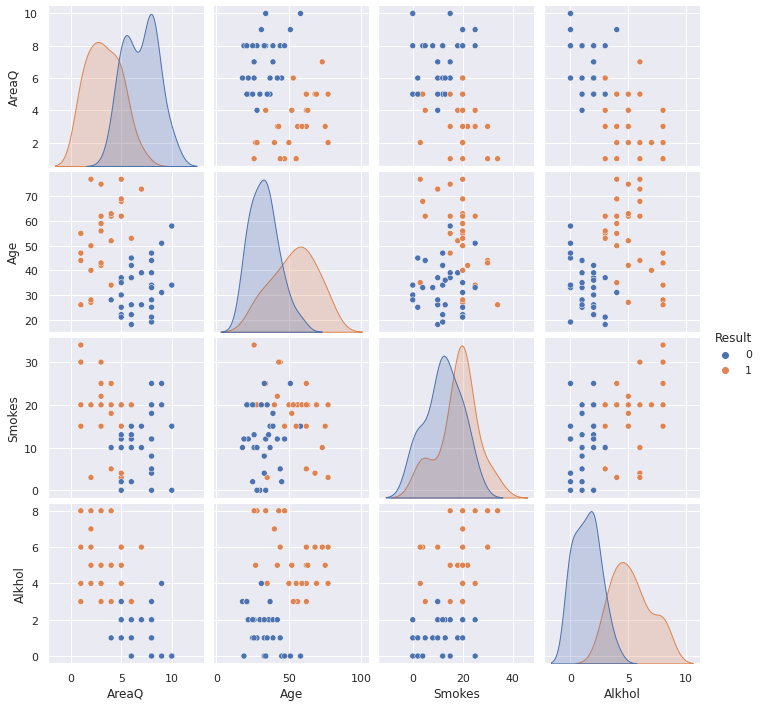

In [7]:
sns.pairplot(df, hue='Result')
plt.show()


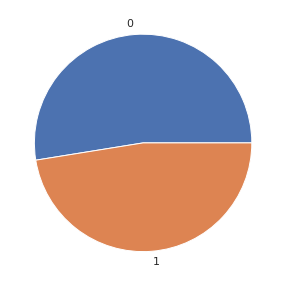

In [8]:
y =df['Result']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()


In [9]:
X = df.drop(columns=['Result'])
X.head(10)

,AreaQ,Age,Smokes,Alkhol
0,5,35,3,4
1,2,27,20,5
2,5,30,0,2
3,8,28,0,1
4,5,68,4,6
5,10,34,0,0
6,10,58,15,0
7,5,22,12,2
8,6,45,2,0
9,4,52,18,5


In [10]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)


,AreaQ,Age,Smokes,Alkhol
0,-0.083321,-0.473821,-1.524356,0.323148
1,-1.312310,-0.970806,0.623016,0.746830
2,-0.083321,-0.784437,-1.903304,-0.524218
3,1.145668,-0.908683,-1.903304,-0.947900
4,-0.083321,1.576244,-1.398040,1.170513
5,1.964994,-0.535944,-1.903304,-1.371583
6,1.964994,0.955012,-0.008564,-1.371583
7,-0.083321,-1.281422,-0.387512,-0.524218
8,0.326342,0.147411,-1.650672,-1.371583
9,-0.492984,0.582273,0.370384,0.746830


In [11]:
X.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
AreaQ,59.0,-1.166675e-16,1.008584,-1.721973,-0.902647,-0.083321,0.940836,1.964994
Age,59.0,-1.618291e-16,1.008584,-1.529914,-0.846560,-0.225328,0.768643,2.135352
Smokes,59.0,6.774242e-17,1.008584,-1.903304,-0.640144,-0.008564,0.623016,2.391441
Alkhol,59.0,9.785016e-17,1.008584,-1.371583,-0.947900,-0.100535,0.746830,2.017879


In [12]:
observations = list(df.index)
variables = list(df.columns)


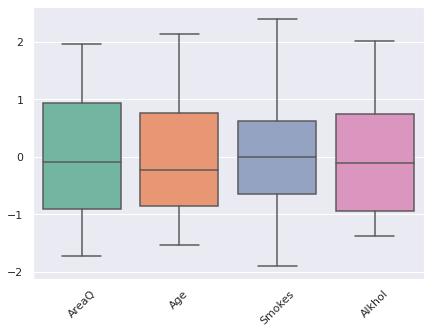

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

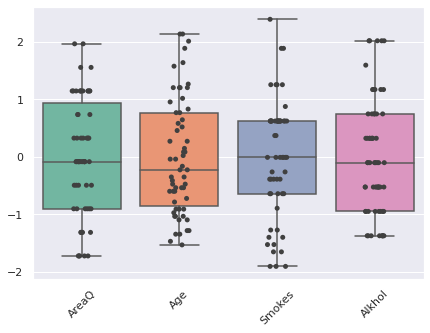

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

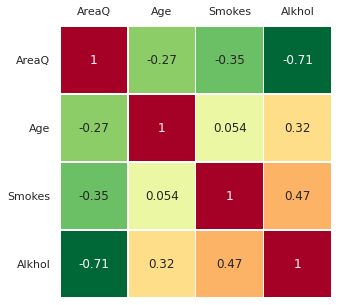

In [15]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

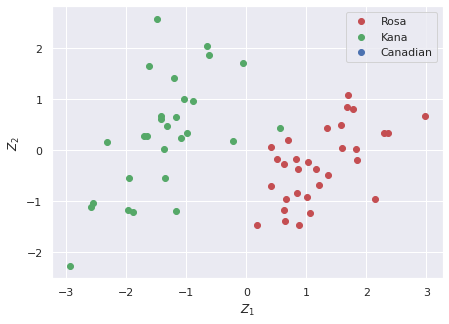

In [16]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

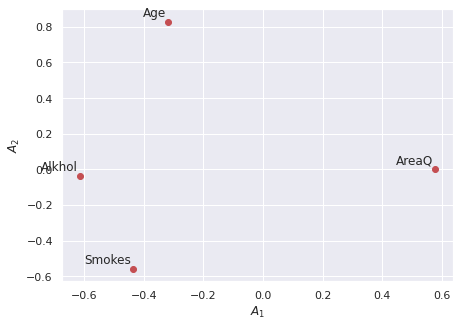

In [17]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


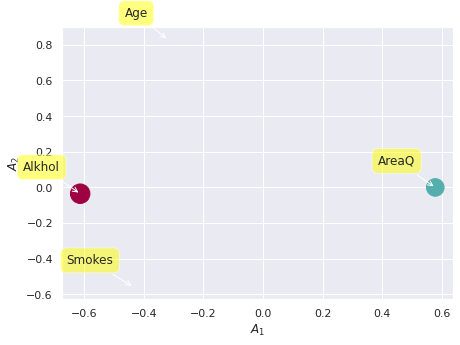

In [18]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

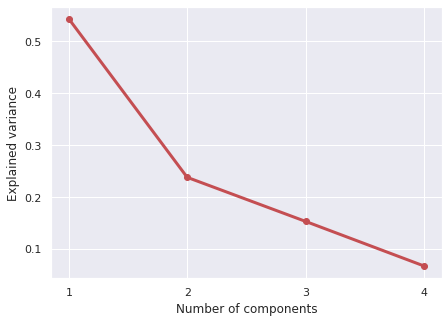

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 


Text(0, 0.5, 'Cumulative explained variance')

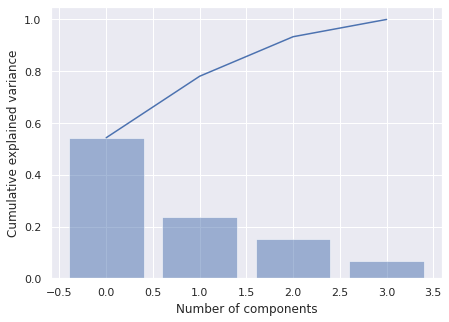

In [20]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


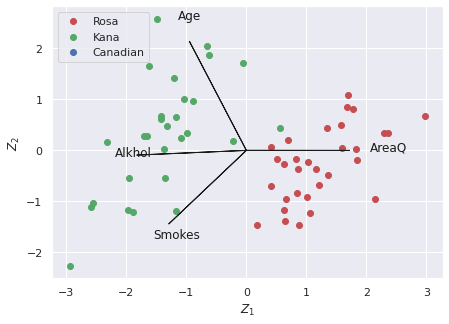

In [22]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

install PCA Library

In [23]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=81c834d8ebb55c552882e025426744877577768321b8c45f2018f5e8386aaa94
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=30a1724d4f7e3d36c471414ff70f5b89b54751da265a8b358ba5694d0f3e52b8
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=362633aed0b9faa37ac1dd1d7d6e4196eee6b5100165c1c98e37a8595a6432ca
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built adjustText sklearn wget


In [24]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [4] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


Principal Components

In [25]:
out['PC']

,PC1,PC2,PC3,PC4
0,0.567203,0.447431,-1.369358,0.512329
1,-1.176842,-1.178672,-0.872978,-0.272419
2,1.350338,0.432010,-1.583808,-0.034101
3,2.359676,0.343723,-0.894158,0.416657
4,-0.661145,2.045357,-0.542552,0.949285
5,2.973787,0.667414,-0.198087,0.569342
6,1.674947,0.844397,1.768483,0.092602
7,0.850376,-0.826597,-0.772993,-0.264639
8,1.699348,1.093160,-0.588538,-0.552294
9,-1.089263,0.249089,0.090936,0.142152


[colourmap]> Warning: Colormap [Set1] can not create [59] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [59] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f71dd833c50>)

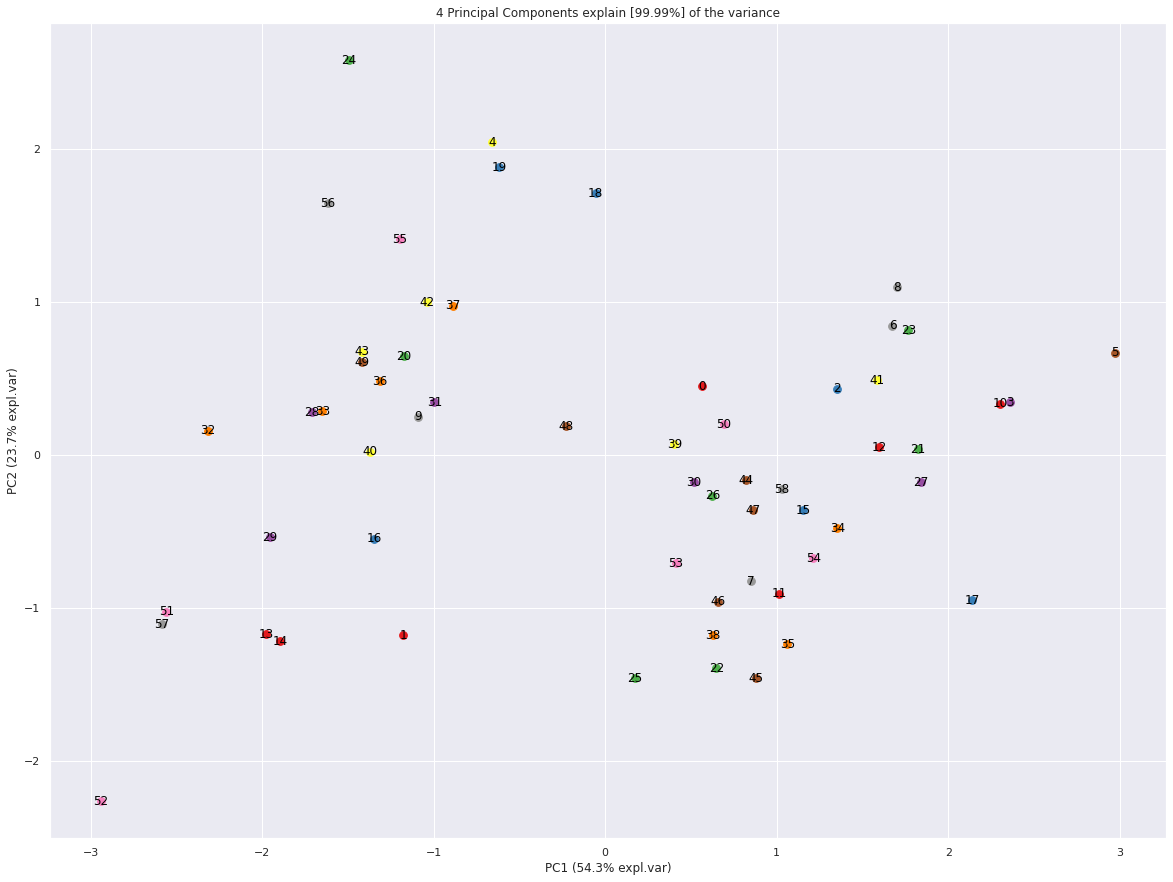

In [26]:
model.scatter(label=True, legend=False)

In [27]:
A = out['loadings'].T

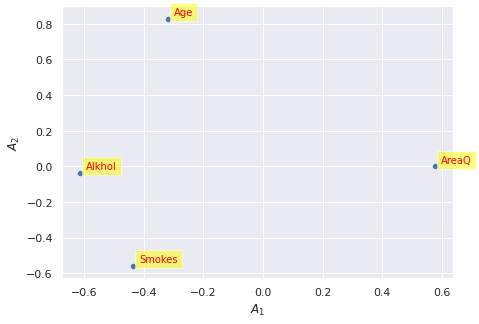

In [28]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

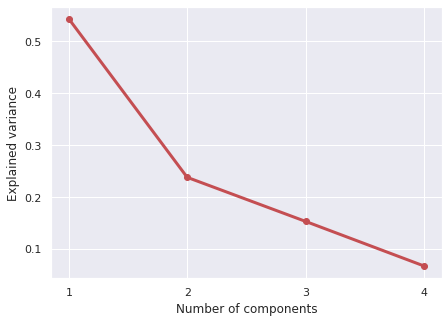

In [29]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

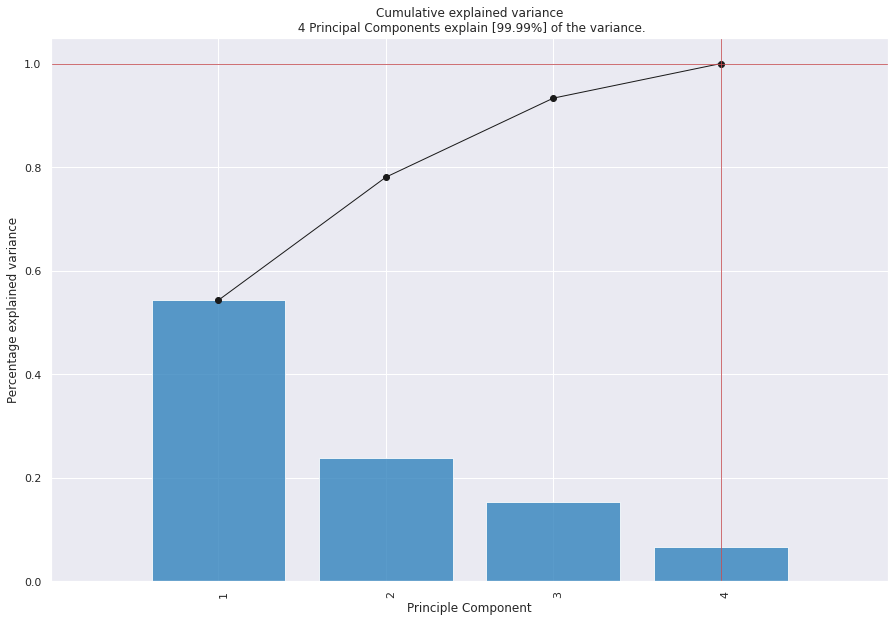

<Figure size 504x360 with 0 Axes>

In [30]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [59] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [59] unique colors! Available unique colors: [9].


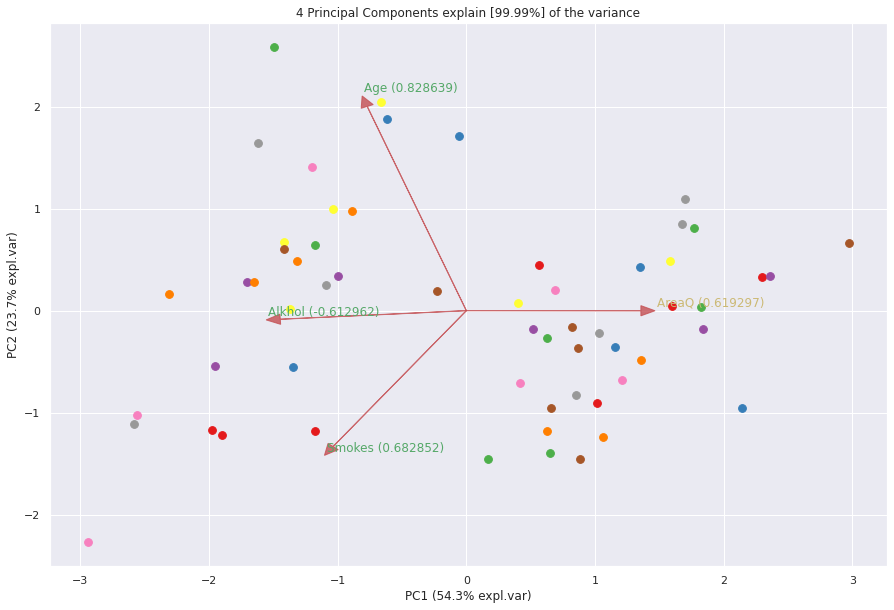

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f71ddb25d50>)

In [31]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [59] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [59] unique colors! Available unique colors: [9].


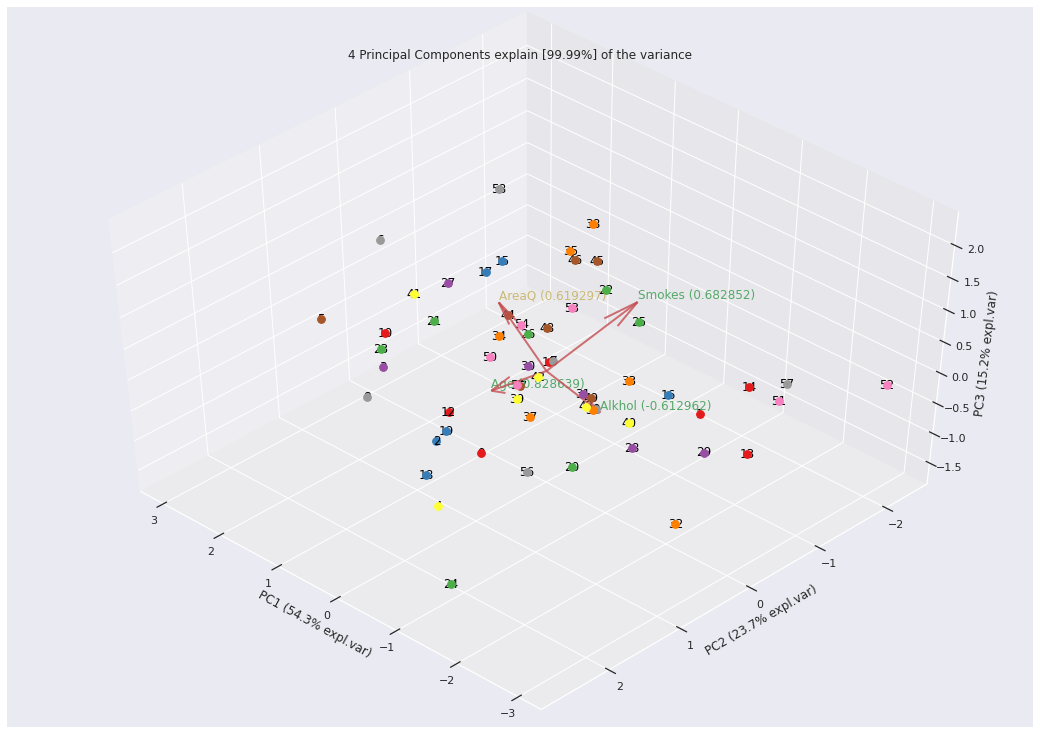

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f71dd902fd0>)

In [32]:
model.biplot3d(legend=False)

In [33]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [34]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (53, 5)
Unseen Data For Predictions: (6, 5)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Result', train_size=0.7, session_id=123)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.6
INFO:logs:Initializing setup()
INFO:logs:setup(target=Result, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_f

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:34:28
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
AreaQ,Categorical
Age,Numeric
Smokes,Categorical
Alkhol,Categorical
Result,Label


In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

In [ ]:
best_model

In [ ]:
dt = create_model('dt')

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

In [ ]:
tuned_dt = tune_model(dt)

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

In [ ]:
!pip install statsmodels --upgrade

In [ ]:
evaluate_model(tuned_dt)

Create K Neighbors Model

In [ ]:
knn = create_model('knn')

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

In [ ]:
evaluate_model(tuned_knn)

Create Logistic Regression Model

In [ ]:
lr = create_model('lr')

In [ ]:
tuned_lr = tune_model(lr)

In [ ]:
evaluate_model(tuned_lr)

Create Random Forest Model

In [ ]:
rf = create_model('rf')

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
evaluate_model(tuned_rf)

Tune the Best Model

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

In [ ]:
tuned_best_model

In [ ]:
evaluate_model(tuned_best_model)

Classification + PCA

In [ ]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

In [ ]:
best_model_pca

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

In [ ]:
tuned_best_model_pca

In [ ]:
evaluate_model(tuned_best_model_pca)

Explainable AI with Shapley values

In [ ]:
!pip install shap

In [ ]:
print("Numpy version: ", np.__version__)

In [ ]:
!pip install numba==0.53

In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

Visualize a single prediction

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')